In [1]:
## LIBRARIES ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB  # Import Gaussian Naive Bayes
from sklearn.metrics import accuracy_score  # Import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from scipy import stats
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA

## warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
## LOADING DATA SET ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# Load your dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
segment_data = pd.read_csv('sample_submission.csv')

## OVERVIEW OF THE DATASET///////////////////////////////////////////////////////////////////////////////
train_data.info() ## Based on the output I've decided to drop the ID column because it doesn't bring any nebefit in the prediction
test_data.info()
train_data

## insert the "Segmentation" column into the test data
test_data.insert(1, 'Segmentation', segment_data['Segmentation']) ## the values for the "Segmentation" column are taken from "segment_data"


X_train = train_data.drop(['Segmentation'], axis = 1) ## removes the "Segmentation" column from the training data, the model will be trained based on the other independent variable. We remove "Segmentation" column because this is what we're trying to predict. We're training the model to predict this column.

## I'm telling Python to create a variable Y_train which will contain a column "Segmentation" with the values from train_data (train.csv)
Y_train = train_data['Segmentation'] 

## same as above but appLied to testing lot
X_test = test_data.drop(['Segmentation'], axis = 1)
X_test
Y_test = test_data['Segmentation']
Y_test

## DETECING DUPLICATES
duplicates_X_train = X_train[X_train.duplicated()]
duplicates_X_train

duplicates_X_test = X_test[X_test.duplicated()]
duplicates_X_test

## DETECTING NULL VALUES
null_values_X_train = X_train.isnull()
null_values_X_train

null_values_X_test = X_test.isnull()
null_values_X_test

missing_count_X_train = X_train.isnull().sum()
print(missing_count_X_train)

missing_count_X_test = X_test.isnull().sum()
print(missing_count_X_test)

## FILLING THE MISSING VALUES FOR "WORK EXPERIENCE" COLUMN
median_work_exp= X_train['Work_Experience'].median()
X_train['Work_Experience'].fillna(median_work_exp, inplace=True)
X_test['Work_Experience'].fillna(median_work_exp, inplace=True)

## FILLING THE MISSING VALUES FOR "FAMILY SIZE" COLUMN
median_family = X_train['Family_Size'].median()
X_train['Family_Size'].fillna(median_family, inplace=True)
X_test['Family_Size'].fillna(median_family, inplace=True)

# ONE HOT ENCODING FOR THE "GENDER" COLUMN - WE NEED TO CHANGE THE OBSERVATION MALE AND FEMALE IN INTEGER VALUES SO WE CAN USE IN A HEATMAP AND IN THE PREDICTION MODELS
X_train = pd.get_dummies(X_train, columns=["Gender"], prefix= "Gender")
X_test = pd.get_dummies(X_test, columns=["Gender"], prefix= "Gender")

# ONE HOT ENCODING FOR THE EVER_MARRIED COLUMN - WE NEED TO CHANGE THE OBSERVATION YES AND NO IN INTEGER VALUES SO WE CAN USE IN A HEATMAP AND IN THE PREDICTION MODELS
X_train = pd.get_dummies(X_train, columns=["Ever_Married"], prefix= "Ever_Married")
X_test = pd.get_dummies(X_test, columns=["Ever_Married"], prefix="Ever_Married")

# ONE HOT ENCODING FOR THE Graduated COLUMN - WE NEED TO CHANGE THE OBSERVATION YES AND NO IN INTEGER VALUES SO WE CAN USE IN A HEATMAP AND IN THE PREDICTION MODELS
X_train = pd.get_dummies(X_train, columns=["Graduated"], prefix= "Graduated")
X_test = pd.get_dummies(X_test, columns=["Graduated"], prefix="Graduated")

# ONE HOT ENCODING FOR THE "SPENDING SCORE" COLUMN - WE NEED TO CHANGE THE OBSERVATION LOW, AVG, HIGH IN INTEGER VALUES SO WE CAN USE IN A HEATMAP AND IN THE PREDICTION MODELS
X_train = pd.get_dummies(X_train, columns=["Spending_Score"], prefix= "Spending_Score")
X_test = pd.get_dummies(X_test, columns=["Spending_Score"], prefix="Spending_Score")

## I NEED TO INPUT MISSING VALUES WITH THE MEAN BUT "PROFESSION""ML MiniProject - Unsupervised.pdf"IS NOT A INTEGER, IS AN OBJECT, SO I NEED TO MAP IT TO CHANGE IT TO INTEGER SO I CAN CALCULATE THE MEDIAN
X_train['Profession'] = X_train['Profession'].map({'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6,'Lawyer': 7, 'Marketing': 8, })
X_test['Profession'] = X_test['Profession'].map({'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Entertainment': 3, 'Executive': 4, 'Healthcare': 5, 'Homemaker': 6,'Lawyer': 7, 'Marketing': 8, })

## FILLING THE MISSING VALUES FOR "PROFESSION" COLUMN
median_profession = X_train['Profession'].median()
X_train['Profession'].fillna(median_profession, inplace=True)
X_test['Profession'].fillna(median_profession, inplace=True)

## I NEED TO INPUT MISSING VALUES WITH THE MEAN BUT "Var_1""ML MiniProject - Unsupervised.pdf"IS NOT A INTEGER, IS AN OBJECT, SO I NEED TO MAP IT TO CHANGE IT TO INTEGER SO I CAN CALCULATE THE MEDIAN
X_train['Var_1'] = X_train['Var_1'].map({'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6,})
X_test['Var_1'] = X_test['Var_1'].map({'Cat_1': 0, 'Cat_2': 1, 'Cat_3': 2, 'Cat_4': 3, 'Cat_5': 4, 'Cat_6': 5, 'Cat_7': 6,})


## FILLING THE MISSING VALUES FOR "Var_1" COLUMN
median_Var_1 = X_train['Var_1'].median()
X_train['Var_1'].fillna(median_profession, inplace=True)
X_test['Var_1'].fillna(median_profession, inplace=True)

X_train.info()

X_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

,ID,Age,Profession,Work_Experience,Family_Size,Var_1,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,462809,22,5.0,1.0,4.0,3.0,False,True,True,False,True,False,False,False,True
1,462643,38,2.0,1.0,3.0,3.0,True,False,False,True,False,True,True,False,False
2,466315,67,2.0,1.0,1.0,5.0,True,False,False,True,False,True,False,False,True
3,461735,67,7.0,0.0,2.0,5.0,False,True,False,True,False,True,False,True,False
4,462669,40,3.0,1.0,6.0,5.0,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,3.0,0.0,7.0,0.0,False,True,True,False,True,False,False,False,True
8064,464685,35,4.0,3.0,4.0,3.0,False,True,True,False,True,False,False,False,True
8065,465406,33,5.0,1.0,1.0,5.0,True,False,True,False,False,True,False,False,True
8066,467299,27,5.0,1.0,4.0,5.0,True,False,True,False,False,True,False,False,True


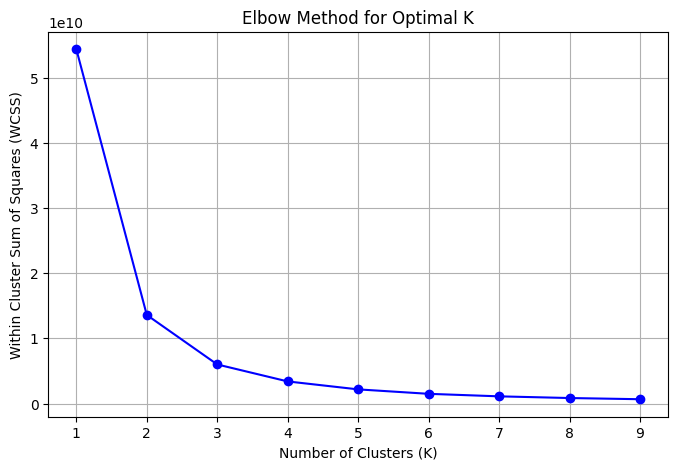

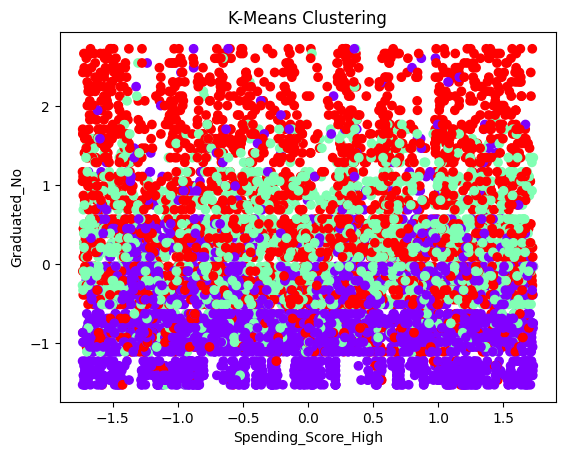

WCSS:  84520.54780095804


In [6]:
### K-MEANS

from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.cluster import KMeans

# Calculate the Within Cluster Sum of Squares (WCSS) for different values of K
wcss = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)  # Fit the K-Means model to data
    wcss.append(kmeans.inertia_)

# Create an elbow plot to visualize the WCSS for different K values
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


# Standardize data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Choose the number of clusters (K). 
k = 3  

# Fit K-Means to your data
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_train_scaled)

# Assign cluster labels to your data
cluster_labels = kmeans.labels_

# Add the cluster labels to your training data
X_train['Cluster'] = cluster_labels

# Scatter plot to visualize K-Means clusters
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Spending_Score_High')
plt.ylabel('Graduated_No')
plt.title('K-Means Clustering')
plt.show()
## model evaluation
print('WCSS: ', kmeans.inertia_)

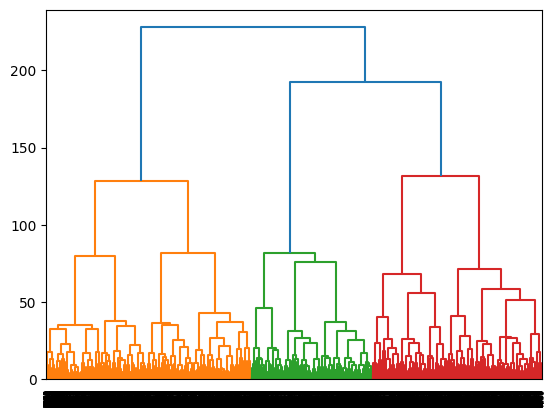

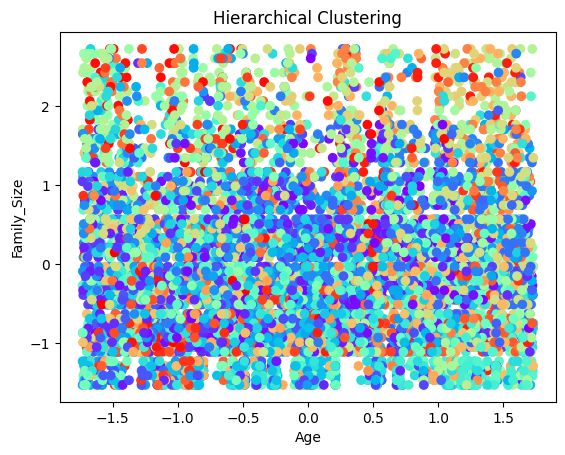

In [4]:
##### Hierarchical Clustering



# Standardize data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Create a dendrogram to visualize the clustering structure 
dendrogram = shc.dendrogram(shc.linkage(X_train_scaled, method='ward'))
plt.show()  

# Choose a distance threshold or number of clusters for cutting the dendrogram
threshold = 10  

# Perform Hierarchical Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
cluster_labels = hierarchical_clustering.fit_predict(X_train_scaled)

# Add the cluster labels to your training data
X_train['Cluster'] = cluster_labels

# Create a scatter plot to visualize the clusters
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.title('Hierarchical Clustering')
plt.show()

